# 03 LASSO, Ridge, and Hyperparameter tuning

In [1]:
library(caret)
library(mlbench)

Loading required package: lattice
Loading required package: ggplot2


The state-of-the-art R package to run penalized (regularized) linear models is `glmnet`.

In [2]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [3]:
data(BostonHousing)

In [4]:
?BostonHousing

In [5]:
trainIndex <- createDataPartition(BostonHousing$medv,p=0.5,list=FALSE)
training.data <- BostonHousing[trainIndex,]
test.data <- BostonHousing[-trainIndex,]

## OLS
We are interested to predict the median value of houses in a tract. Let's first use OLS:

In [6]:
ols.fit <- lm(medv ~.,data=training.data)
summary(ols.fit)


Call:
lm(formula = medv ~ ., data = training.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5680 -3.1125 -0.9062  1.8803 24.5200 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.224098   7.338555   4.391 1.69e-05 ***
crim         -0.100796   0.051259  -1.966 0.050404 .  
zn            0.058615   0.019037   3.079 0.002319 ** 
indus        -0.045325   0.095304  -0.476 0.634808    
chas1         0.994125   1.478601   0.672 0.502013    
nox         -10.540056   5.747473  -1.834 0.067913 .  
rm            3.720692   0.582899   6.383 8.88e-10 ***
age          -0.001429   0.019004  -0.075 0.940124    
dis          -1.660317   0.279163  -5.947 9.56e-09 ***
rad           0.322293   0.093505   3.447 0.000670 ***
tax          -0.013992   0.005531  -2.530 0.012055 *  
ptratio      -0.792934   0.195195  -4.062 6.59e-05 ***
b             0.012409   0.003555   3.490 0.000574 ***
lstat        -0.605643   0.070210  -8.626 8.80e-16 ***
---
Signif. co

In [9]:
print(mean((training.data$medv-predict(ols.fit))^2))
print(mean((test.data$medv-predict(ols.fit,newdata=test.data))^2))

[1] 22.09024
[1] 23.03162


## LASSO

In [18]:
x <- model.matrix(medv~.,data=training.data)[,-1]
y <-training.data$medv

In [31]:
glm.fit <- glmnet(x,y,lambda=0)

In [32]:
coef(glm.fit,s=0)

14 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  32.184367767
crim         -0.100494501
zn            0.058478269
indus        -0.046522105
chas1         1.001240767
nox         -10.555320231
rm            3.725316070
age          -0.001520928
dis          -1.660791907
rad           0.320174289
tax          -0.013872364
ptratio      -0.792493934
b             0.012401224
lstat        -0.605143373

In [33]:
glm.fit <- glmnet(x,y)

In [42]:
coef(glm.fit,s=exp(-1))

14 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) 16.082901656
crim        -0.006087764
zn           0.003469401
indus       -0.045947932
chas1        .          
nox          .          
rm           4.266834625
age          .          
dis         -0.527125087
rad          .          
tax          .          
ptratio     -0.725548398
b            0.009592757
lstat       -0.607510195

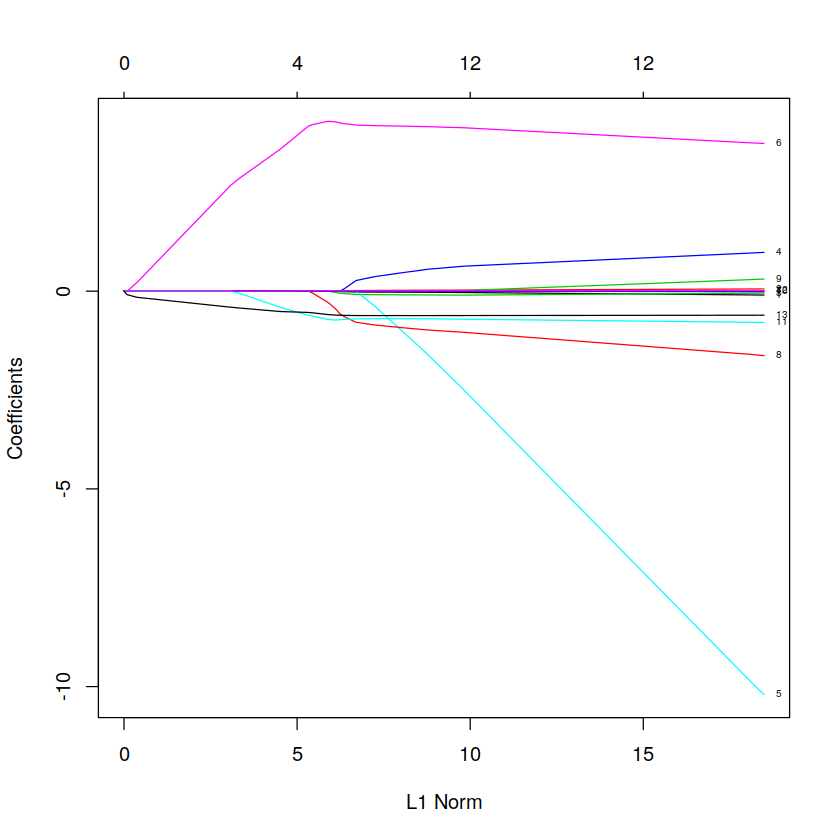

In [45]:
plot(glm.fit,label=TRUE)

In [46]:
cv.glmnet.fit <- cv.glmnet(x,y)

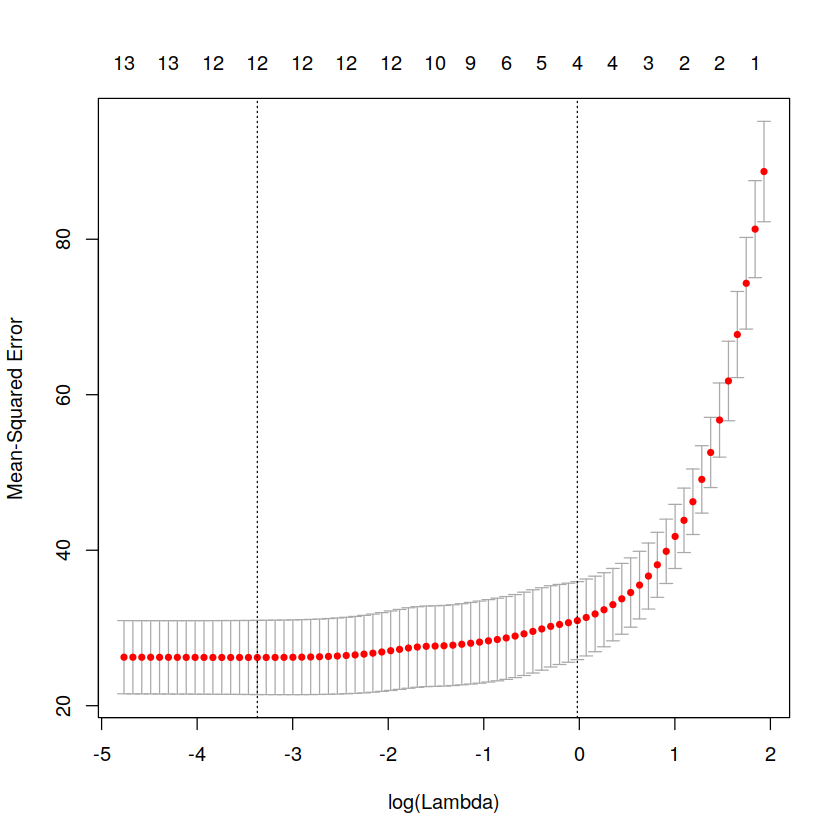

In [47]:
plot(cv.glmnet.fit)

## Ridge

In [48]:
glm.fit.ridge <- glmnet(x,y,alpha=0)

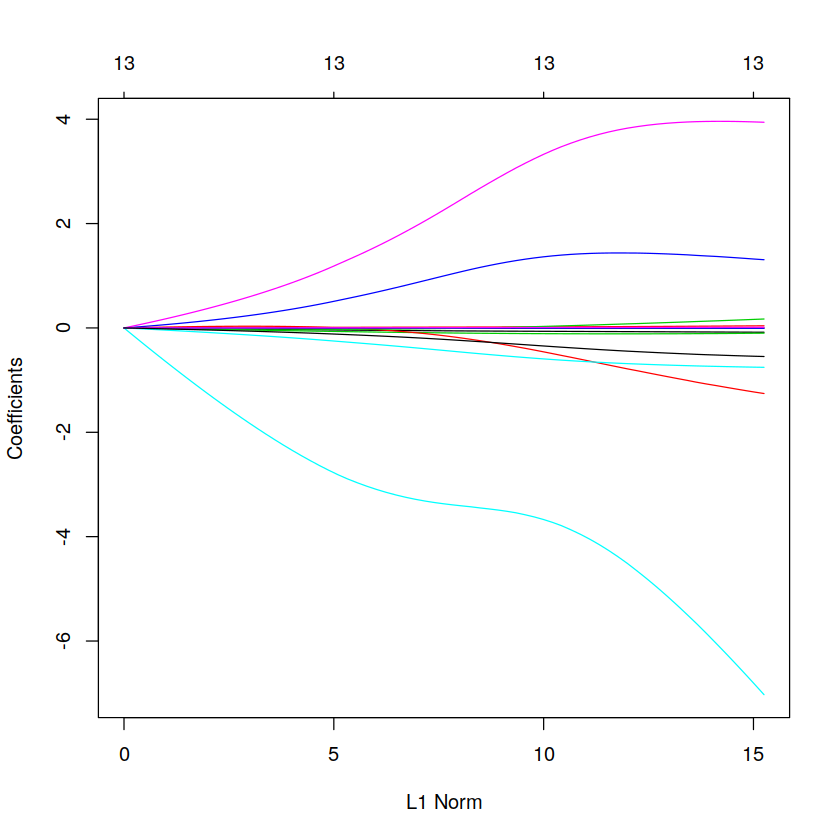

In [49]:
plot(glm.fit.ridge)

In [56]:
ridge.lambda.grid <- exp(seq(-2,4,length.out=100))
cv.glmnet.fit <- cv.glmnet(x,y,alpha=0,lambda=ridge.lambda.grid)

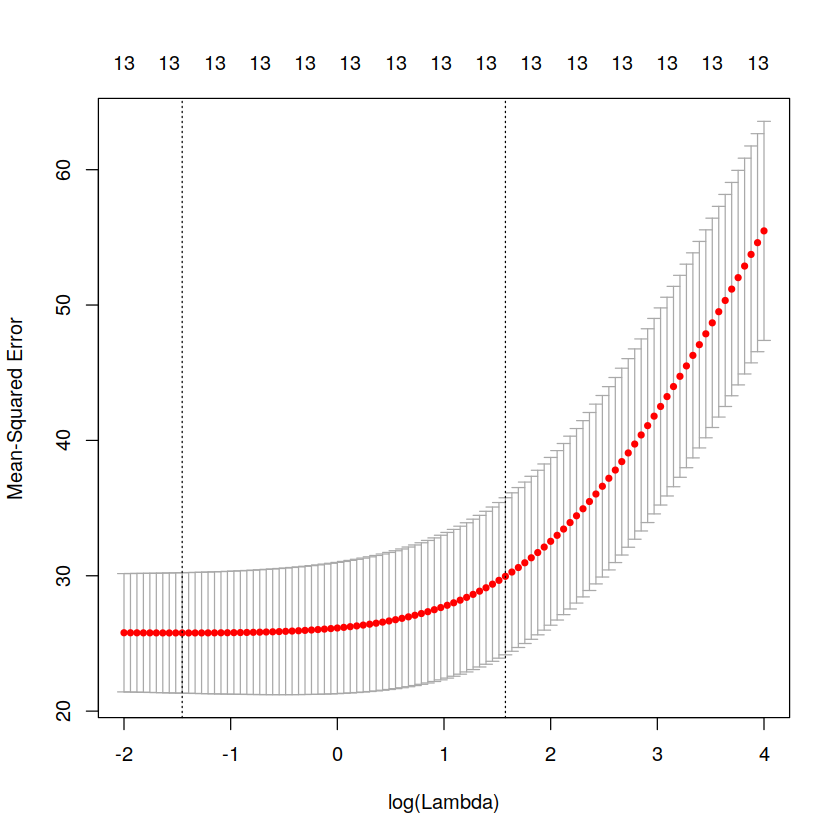

In [54]:
plot(cv.glmnet.fit)